In [20]:
import glob
import geopandas as gpd
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [21]:
areas_df = pd.DataFrame()

In [22]:
with open('C:/repos/satellite-images-nso/postprocessing/no_clouds_schippers_gat.pkl', 'rb') as f:
    no_clouds = pickle.load(f)
print(no_clouds)

['E:/data/nieuwkoopse_plassen_schippersgat\\20120322_102446_Form_200cm_RD_8bit_RGB_Breukelen_str01_01_Schippersgat_cropped.tif', 'E:/data/nieuwkoopse_plassen_schippersgat\\20120331_102440_Form_200cm_RD_8bit_RGBI_Breukelen_Schippersgat_cropped.tif', 'E:/data/nieuwkoopse_plassen_schippersgat\\20120418_102429_Form_200cm_RD_8bit_RGBI_Breukelen_Schippersgat_cropped.tif', 'E:/data/nieuwkoopse_plassen_schippersgat\\20120506_102424_Form_200cm_RD_8bit_RGBI_Loenen_Schippersgat_cropped.tif', 'E:/data/nieuwkoopse_plassen_schippersgat\\20120515_102411_Form_200cm_RD_8bit_RGBI_Woerden_Schippersgat_cropped.tif', 'E:/data/nieuwkoopse_plassen_schippersgat\\20190302_113613_SV1-02_50cm_RD_11bit_RGBI_Mijdrecht_Schippersgat_cropped_ndwi_re_ndvi.tif', 'E:/data/nieuwkoopse_plassen_schippersgat\\20190409_111030_SV1-04_50cm_RD_11bit_RGBI_Mijdrecht_Schippersgat_cropped_ndwi_re_ndvi.tif', 'E:/data/nieuwkoopse_plassen_schippersgat\\20190416_113410_SV1-02_50cm_RD_11bit_RGBI_Nieuwveen_Schippersgat_cropped_ndwi_re_nd

In [23]:
for afile in glob.glob("E:/output/schippersgat/*"):
    afile = afile.replace("\\","/")
    print(afile)

    date = afile.split("/")[-1].split("_")[0]+" "+afile.split("/")[-1].split("_")[1]

    gdf = gpd.read_file(afile)  # Load GeoJSON file into a GeoDataFrame
    gdf = gdf.to_crs(epsg=3395) # Convert to a metric CRS to ensure area calculations are in square meters
    gdf['area'] = gdf.geometry.area  # Calculate the area of each feature
    gdf['date'] = date  # Add date information
    areas_df = pd.concat([areas_df, gdf])
    

E:/output/schippersgat/20190302_113613_SV1-02_50cm_RD_11bit_RGBI_Mijdrecht_Schippersgat_cropped_ndwi_re_ndvi.geojson
E:/output/schippersgat/20190409_111030_SV1-04_50cm_RD_11bit_RGBI_Mijdrecht_Schippersgat_cropped_ndwi_re_ndvi.geojson
E:/output/schippersgat/20190416_113410_SV1-02_50cm_RD_11bit_RGBI_Nieuwveen_Schippersgat_cropped_ndwi_re_ndvi.geojson
E:/output/schippersgat/20190424_112650_SV1-02_50cm_RD_11bit_RGBI_VinkeveensePlassen_Schippersgat_cropped_ndwi_re_ndvi.geojson
E:/output/schippersgat/20190523_105729_SV1-01_50cm_RD_11bit_RGBI_VinkeveensePlassen_Schippersgat_cropped_ndwi_re_ndvi.geojson
E:/output/schippersgat/20190523_111841_SV1-04_50cm_RD_11bit_RGBI_Mijdrecht_Schippersgat_cropped_ndwi_re_ndvi.geojson
E:/output/schippersgat/20190629_113712_SV1-02_50cm_RD_11bit_RGBI_Mijdrecht_Schippersgat_cropped_ndwi_re_ndvi.geojson
E:/output/schippersgat/20190826_111247_SV1-01_50cm_RD_11bit_RGBI_Mijdrecht_Schippersgat_cropped_ndwi_re_ndvi.geojson
E:/output/schippersgat/20200812_111845_SV1-02_

In [24]:
areas_df['date'] = pd.to_datetime(areas_df['date'])
areas_df = areas_df.sort_values('date')

In [25]:
areas_df_waterplants = areas_df[areas_df['label'] == "Waterplants"]

In [26]:
areas_df_waterplants

,label,geometry,area,date
2,Waterplants,"MULTIPOLYGON (((537997.817 6796046.223, 537997...",1248.723473,2019-03-02 11:36:13
2,Waterplants,"MULTIPOLYGON (((537818.964 6795924.457, 537818...",4084.348293,2019-04-09 11:10:30
2,Waterplants,"MULTIPOLYGON (((537874.628 6795560.445, 537874...",3229.366466,2019-04-16 11:34:10
2,Waterplants,"MULTIPOLYGON (((537821.135 6795534.818, 537821...",111351.362743,2019-04-24 11:26:50
2,Waterplants,"MULTIPOLYGON (((537832.959 6795477.967, 537832...",143889.523776,2019-05-23 10:57:29
2,Waterplants,"MULTIPOLYGON (((538109.915 6795641.148, 538110...",148.234205,2019-05-23 11:18:41
2,Waterplants,"MULTIPOLYGON (((537869.986 6795422.936, 537869...",153024.973443,2019-06-29 11:37:12
2,Waterplants,"MULTIPOLYGON (((537841.969 6795469.902, 537841...",128486.526557,2019-08-26 11:12:47
2,Waterplants,"MULTIPOLYGON (((537911.877 6795157.264, 537911...",128227.578819,2020-08-12 11:18:45
2,Waterplants,"MULTIPOLYGON (((537835.412 6795476.359, 537836...",114459.335680,2021-06-17 11:15:32


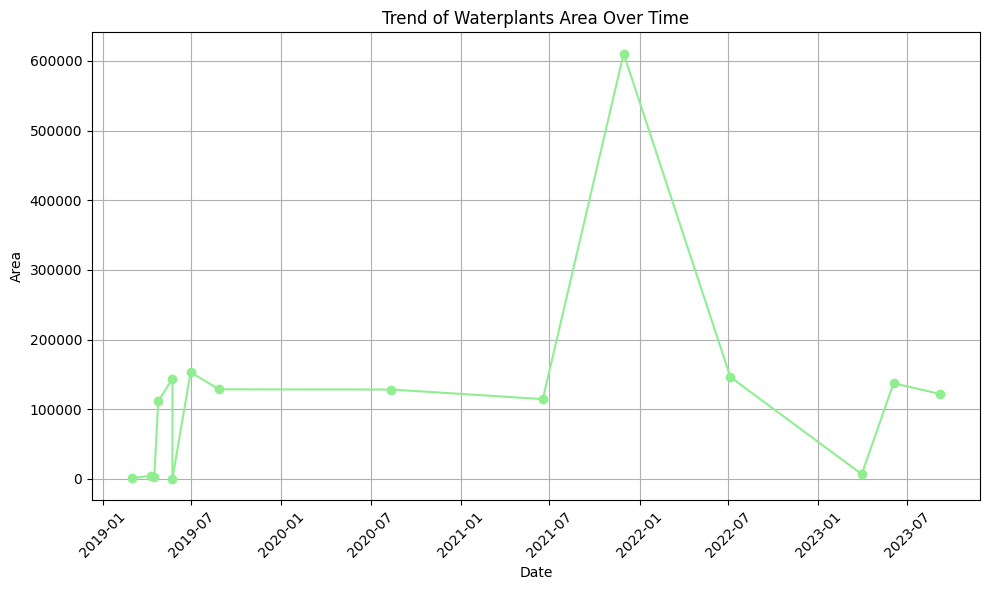

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(areas_df_waterplants['date'], areas_df_waterplants['area'], marker='o', color='lightgreen')
plt.title('Trend of Waterplants Area Over Time')
plt.xlabel('Date')
plt.ylabel('Area')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [33]:
areas_df_waterplants = areas_df_waterplants[areas_df_waterplants["date"] != "2021-11-29 10:39:11"]
areas_df_waterplants = areas_df_waterplants[areas_df_waterplants["date"] != "2019-05-23 11:18:41"]

In [35]:
areas_df_waterplants

,label,geometry,area,date
2,Waterplants,"MULTIPOLYGON (((537997.817 6796046.223, 537997...",1248.723473,2019-03-02 11:36:13
2,Waterplants,"MULTIPOLYGON (((537818.964 6795924.457, 537818...",4084.348293,2019-04-09 11:10:30
2,Waterplants,"MULTIPOLYGON (((537874.628 6795560.445, 537874...",3229.366466,2019-04-16 11:34:10
2,Waterplants,"MULTIPOLYGON (((537821.135 6795534.818, 537821...",111351.362743,2019-04-24 11:26:50
2,Waterplants,"MULTIPOLYGON (((537832.959 6795477.967, 537832...",143889.523776,2019-05-23 10:57:29
2,Waterplants,"MULTIPOLYGON (((537869.986 6795422.936, 537869...",153024.973443,2019-06-29 11:37:12
2,Waterplants,"MULTIPOLYGON (((537841.969 6795469.902, 537841...",128486.526557,2019-08-26 11:12:47
2,Waterplants,"MULTIPOLYGON (((537911.877 6795157.264, 537911...",128227.578819,2020-08-12 11:18:45
2,Waterplants,"MULTIPOLYGON (((537835.412 6795476.359, 537836...",114459.335680,2021-06-17 11:15:32
2,Waterplants,"MULTIPOLYGON (((537842.782 6795469.908, 537841...",146021.550080,2022-07-05 11:00:02


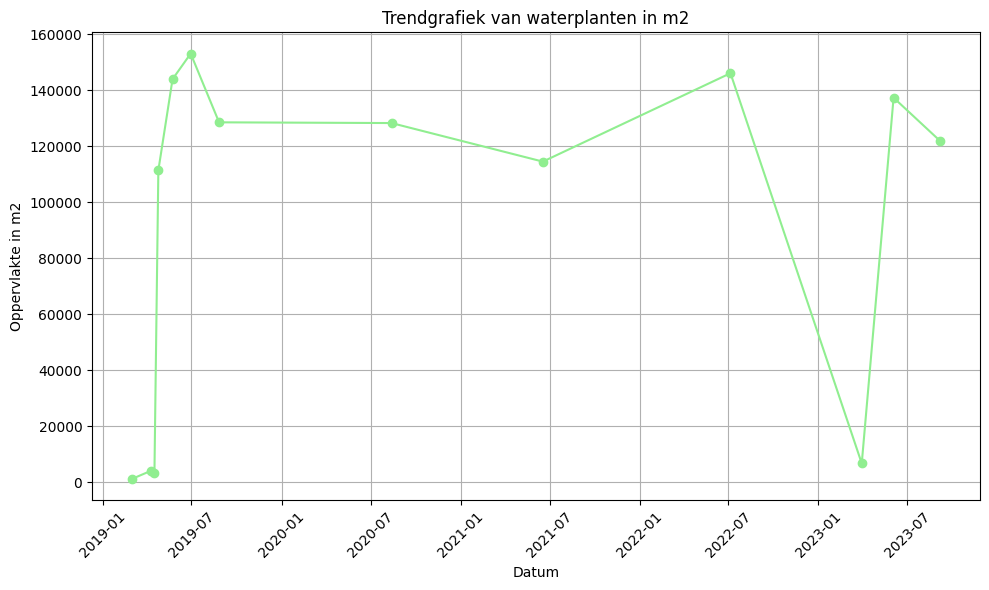

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(areas_df_waterplants['date'], areas_df_waterplants['area'], marker='o', color='lightgreen')
plt.title('Trendgrafiek van waterplanten in m2')
plt.xlabel('Datum')
plt.ylabel('Oppervlakte in m2')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()